#Binary Search#

In [ ]:
%%writefile binary.cpp
#include <iostream>
#include <cassert>
#include <vector>

using std::vector;

int binary_search(const vector<int> &a, int x, int left, int right) {

  //write your code here
  int middle = left + (int)(right-left)/2;
  if(middle == left){
    if(a[middle] == x) return middle;
    else if(a[right]==x) return right;
    else return -1;
  } 
  if(x<a[middle]){
    return binary_search(a, x, left, middle);
  }
  if(x>a[middle]){
    return binary_search(a, x, middle, right);
  }
  if(x==a[middle]) return middle;
  return -1;
}

int linear_search(const vector<int> &a, int x) {
  for (size_t i = 0; i < a.size(); ++i) {
    if (a[i] == x) return i;
  }
  return -1;
}

int main() {
  int n;
  std::cin >> n;
  vector<int> a(n);
  for (size_t i = 0; i < a.size(); i++) {
    std::cin >> a[i];
  }
  int m;
  std::cin >> m;
  vector<int> b(m);
  for (int i = 0; i < m; ++i) {
    std::cin >> b[i];
  }
  for (int i = 0; i < m; ++i) {
    //replace with the call to binary_search when implemented
    std::cout << binary_search(a, b[i], 0, a.size()-1) << ' ';
    //std::cout << linear_search(a, b[i]) << ' ';
  }
}


Writing binary.cpp


In [ ]:
!g++ binary.cpp -o exe
!./exe

 5 1 5 8 12 13 5 8 1 23 1 11
2 0 -1 0 -1 

#Majority Element#

In [ ]:
%%writefile majority.cpp
#include <algorithm>
#include <iostream>
#include <vector>

using std::vector;
using namespace std;
int get_majority_element(vector<int> &a, int left, int right) {
  if (left == right) return -1;
  if (left + 1 == right) return a[left];
  //write your code here

  return -1;
}
vector<int> merge(vector<int> a, vector<int> b){
  vector<int> fusion(a.size() + b.size());
  int k = 0; //A
  int j = 0; //B
  for(int i = 0; i<fusion.size(); i++){
    if((int)a.size()>0 && a[0]<=b[0] || b.size()==0){
      fusion[i] = a[0];
      a.erase(a.begin());
    } 
    else if((int)b.size()>0 && a[0]>b[0] || a.size()==0){
      fusion[i] = b[0];
      b.erase(b.begin());
    }
  }
  return fusion;
}
vector<int> mergeSort(vector<int> a){
  if (a.size() == 1) return a;

  int middle = (int) a.size()/2;
  
  vector<int> a1(a.begin(), a.begin()+middle);
  vector<int> a2(a.begin()+middle, a.end());
  vector<int> A =  mergeSort(a1);
  vector<int> B =  mergeSort(a2);
  return merge(A,B);
}


int main() {
  int n;
  std::cin >> n;
  vector<int> a(n);
  for (size_t i = 0; i < a.size(); ++i) {
    std::cin >> a[i];
  }
  //std::cout << (get_majority_element(a, 0, a.size()) != -1) << '\n';
  vector<int> b = mergeSort(a);
  
  /*std::cout<<b.size()<<std::endl;
  for(int i = 0; i<b.size(); i++){
    std::cout<< b[i]<<" ";
  }*/
  int lastOne = -1;
  bool exists = false;
  lastOne = b[0];
  for(int i = 0; i<int(b.size()/2)+1; i++){
    if(b[i] == b[i+(int)(b.size()/2)]){
      exists = true;
      break;
    } 

  }
  std::cout<<exists<<'\n';
}



Writing majority.cpp


In [ ]:
!g++ majority.cpp -o exe
!./exe

5 2 3 9 2 2
1


#Improving Quick Sort#

In [ ]:
%%writefile quicksort.cpp

#include <iostream>
#include <vector>
#include <cstdlib>

using std::vector;
using std::swap;

vector<int> partition2(vector<int> &a, int l, int r) {
  int j = l;
  int i = r;
  int m1 = j;
  int m2 = j;
  int x = a[l];
  //swap(a[m1], a[l]);
  while(j<i){
    
    if(a[j+1]<a[j]){
      if(m1==m2) {

        swap(a[j+1],a[j]);
        j++;
        m1 = j;
        m2 = j;
      }
      else {
        
        swap(a[m1],a[j+1]);
        j++;
        m1++;
        m2++;
         
        
      }
    } 
    else if(a[j+1]>a[j]){
        swap(a[j+1],a[i]);
        i--;
      
    }
    else{
      if(m1==m2){ 
        m1 = j;
        m2 = j+1;
        j++;
      }
      else{
        m2++;
        j++;
      }
      //j++;
      //m2 = j;
      //std::cout <<"m1: " <<m1<<'\n';
      //std::cout <<"m2: " <<m2<<'\n';
      //std::cout <<"j: " <<j<<'\n';
      /*if(j==2){
        std::cout <<"j: " <<j<<'\n';
        break;
      }*/
    }
  }
  vector<int> m(2);
  
  m[0] = m1;
  m[1] = m2;
  return m;
}

void randomized_quick_sort(vector<int> &a, int l, int r) {
  if (l >= r) {
    return;
  }

  int k = l + rand() % (r - l + 1);
  swap(a[l], a[k]);
  
  //std::cout <<"Con random: "<< k <<'\n';
  vector<int> m = partition2(a, l, r);
  int m1 = m[0];
  int m2 = m[1];
  //std::cout << m1 << ' ';
  //std::cout << m2 << ' '<<'\n';
  /*for (size_t i = 0; i < a.size(); ++i) {
    std::cout << a[i] << ' ';
  }
  std::cout <<'\n';*/

  if(m1==-1) return;
  randomized_quick_sort(a, l, m1 - 1);
  randomized_quick_sort(a, m2 + 1, r);
}

int main() {
  int n;
  std::cin >> n;
  vector<int> a(n);
  for (size_t i = 0; i < a.size(); ++i) {
    std::cin >> a[i];
  }
  randomized_quick_sort(a, 0, a.size() - 1);
  //partition2(a, 0, a.size()-1);
  for (size_t i = 0; i < a.size(); ++i) {
    std::cout << a[i] << ' ';
  }
}



Writing quicksort.cpp


In [ ]:
!g++ quicksort.cpp -o exe
!./exe

5 2 3 9 2 2
2 2 2 3 9 

#Capturas#

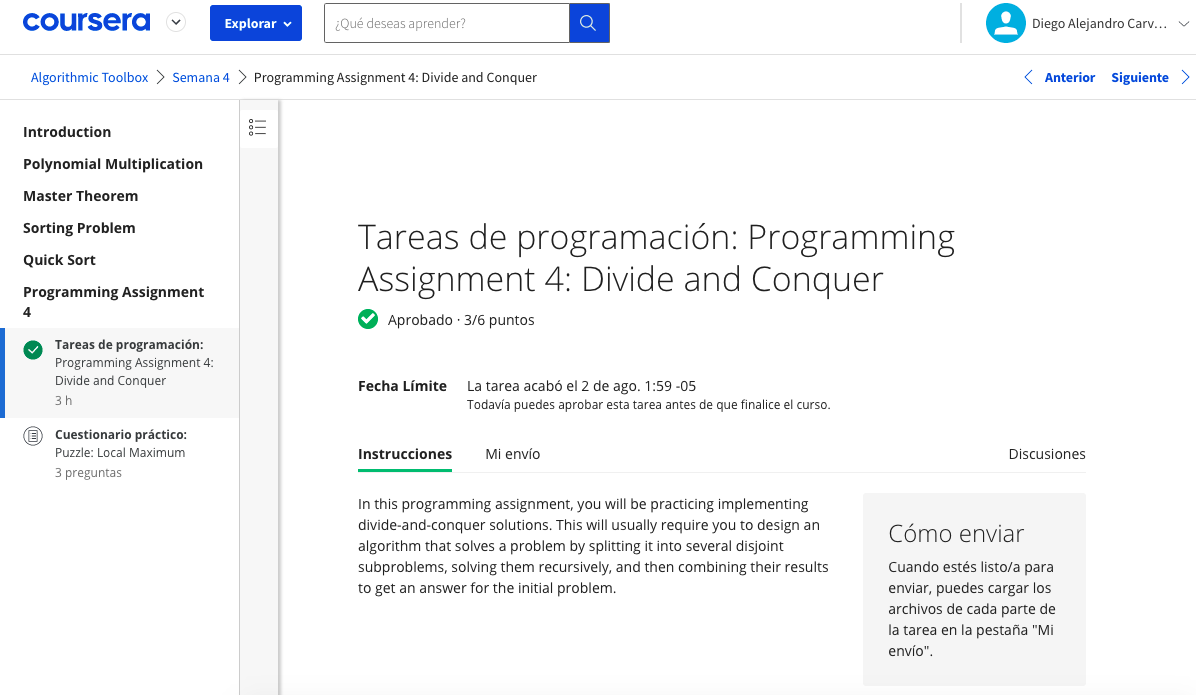